In [150]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
import sys, os

In [152]:
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [153]:
root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.insert(0, root_path)
from data_processing import DataProcessing
from plotting import Plotting

### Data preprocessing

In [154]:
my_data = DataProcessing()

In [155]:
my_data.read_data("../data/crop_yield_dataset.csv")

,Temperature (°C),Rainfall (mm),Humidity (%),Soil Type,Weather Condition,Crop Type,Yield (tons/hectare)
0,22.490802,185.132929,53.085284,Sandy,Sunny,Barley,2.818937
1,34.014286,541.900947,52.348940,Loamy,Sunny,Corn,8.014166
2,29.639879,872.945836,85.312729,Peaty,Rainy,Wheat,9.249868
3,26.973170,732.224886,52.477310,Sandy,Sunny,Soybeans,7.947481
4,18.120373,806.561148,53.597486,Clay,Stormy,Barley,6.262616
...,...,...,...,...,...,...,...
995,16.831641,656.955156,83.264788,Sandy,Sunny,Corn,6.822771
996,33.346272,956.614621,47.863660,Peaty,Rainy,Soybeans,7.820291
997,17.736373,68.958016,55.489393,Loamy,Sunny,Corn,2.921246
998,34.004747,57.054721,54.502277,Loamy,Rainy,Rice,6.705009


In [156]:
my_data.head(10)

,0,1,2,3,4,5,6,7,8,9
Temperature (°C),22.490802,34.014286,29.639879,26.97317,18.120373,18.11989,16.161672,32.323523,27.0223,29.161452
Rainfall (mm),185.132929,541.900947,872.945836,732.224886,806.561148,658.783367,692.276565,849.195652,249.668009,489.424964
Humidity (%),53.085284,52.34894,85.312729,52.47731,53.597486,77.969913,62.486992,78.835528,43.268308,64.37856
Soil Type,Sandy,Loamy,Peaty,Sandy,Clay,Sandy,Sandy,Clay,Silty,Silty
Weather Condition,Sunny,Sunny,Rainy,Sunny,Stormy,Rainy,Sunny,Rainy,Cloudy,Rainy
Crop Type,Barley,Corn,Wheat,Soybeans,Barley,Soybeans,Wheat,Corn,Soybeans,Rice
Yield (tons/hectare),2.818937,8.014166,9.249868,7.947481,6.262616,8.885343,7.559347,2.084409,5.152721,8.807615


In [157]:
my_data.check_duplicates()

0

In [158]:
my_data.standardize_columns_names()

,temperature_°c,rainfall_mm,humidity_%,soil_type,weather_condition,crop_type,yield_tons/hectare
0,22.490802,185.132929,53.085284,Sandy,Sunny,Barley,2.818937
1,34.014286,541.900947,52.348940,Loamy,Sunny,Corn,8.014166
2,29.639879,872.945836,85.312729,Peaty,Rainy,Wheat,9.249868
3,26.973170,732.224886,52.477310,Sandy,Sunny,Soybeans,7.947481
4,18.120373,806.561148,53.597486,Clay,Stormy,Barley,6.262616
...,...,...,...,...,...,...,...
995,16.831641,656.955156,83.264788,Sandy,Sunny,Corn,6.822771
996,33.346272,956.614621,47.863660,Peaty,Rainy,Soybeans,7.820291
997,17.736373,68.958016,55.489393,Loamy,Sunny,Corn,2.921246
998,34.004747,57.054721,54.502277,Loamy,Rainy,Rice,6.705009


In [159]:
col = my_data.select_columns()
col

Index(['soil_type', 'weather_condition', 'crop_type'], dtype='object')

In [160]:
columns_lists = list(col)

In [161]:
my_data.rename_observation_column(columns_lists)

,temperature_°c,rainfall_mm,humidity_%,soil_type,weather_condition,crop_type,yield_tons/hectare
0,22.490802,185.132929,53.085284,sandy,sunny,barley,2.818937
1,34.014286,541.900947,52.348940,loamy,sunny,corn,8.014166
2,29.639879,872.945836,85.312729,peaty,rainy,wheat,9.249868
3,26.973170,732.224886,52.477310,sandy,sunny,soybeans,7.947481
4,18.120373,806.561148,53.597486,clay,stormy,barley,6.262616
...,...,...,...,...,...,...,...
995,16.831641,656.955156,83.264788,sandy,sunny,corn,6.822771
996,33.346272,956.614621,47.863660,peaty,rainy,soybeans,7.820291
997,17.736373,68.958016,55.489393,loamy,sunny,corn,2.921246
998,34.004747,57.054721,54.502277,loamy,rainy,rice,6.705009


### EDA

In [168]:
data = my_data.read_data("../data/crop_yield_dataset.csv")
data

,Temperature (°C),Rainfall (mm),Humidity (%),Soil Type,Weather Condition,Crop Type,Yield (tons/hectare)
0,22.490802,185.132929,53.085284,Sandy,Sunny,Barley,2.818937
1,34.014286,541.900947,52.348940,Loamy,Sunny,Corn,8.014166
2,29.639879,872.945836,85.312729,Peaty,Rainy,Wheat,9.249868
3,26.973170,732.224886,52.477310,Sandy,Sunny,Soybeans,7.947481
4,18.120373,806.561148,53.597486,Clay,Stormy,Barley,6.262616
...,...,...,...,...,...,...,...
995,16.831641,656.955156,83.264788,Sandy,Sunny,Corn,6.822771
996,33.346272,956.614621,47.863660,Peaty,Rainy,Soybeans,7.820291
997,17.736373,68.958016,55.489393,Loamy,Sunny,Corn,2.921246
998,34.004747,57.054721,54.502277,Loamy,Rainy,Rice,6.705009


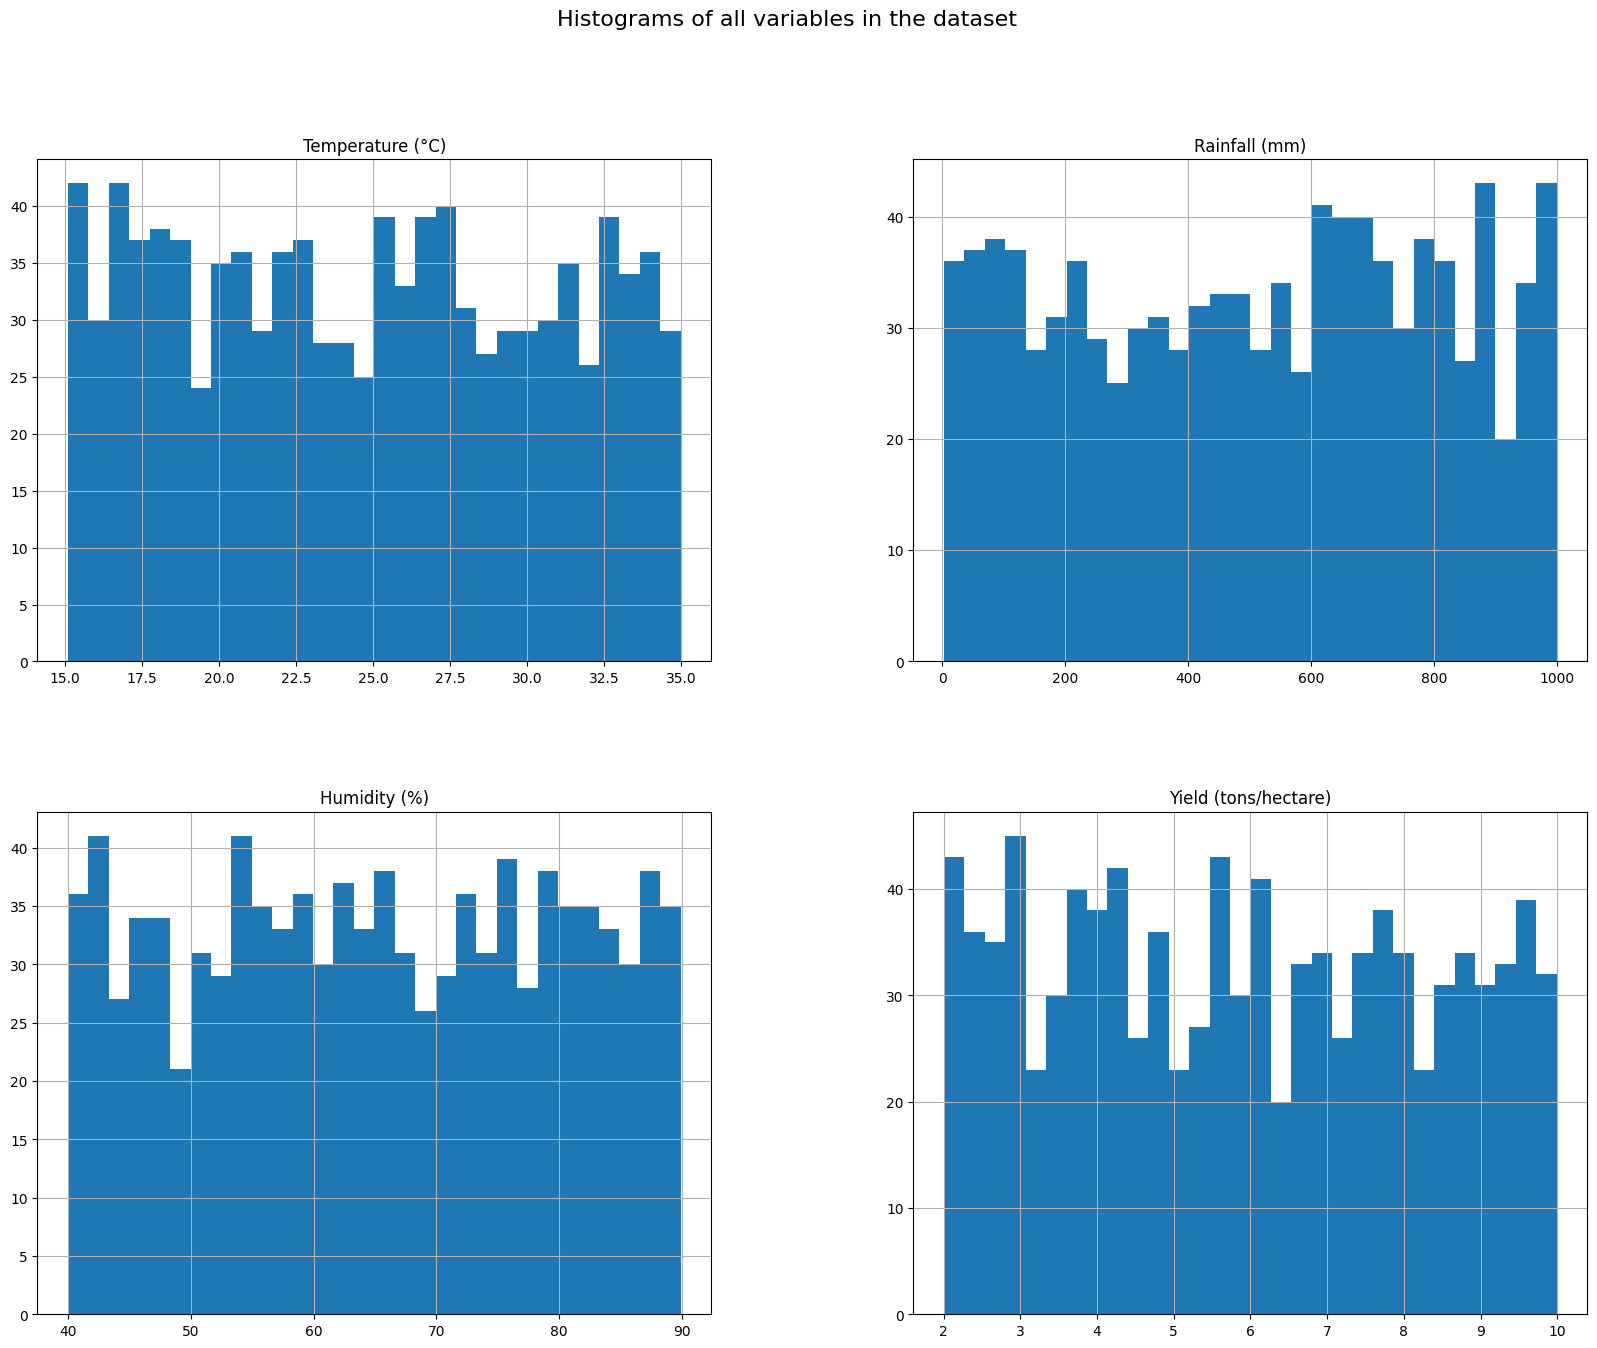

In [169]:
pl = Plotting(data)
pl.plot_histogram()

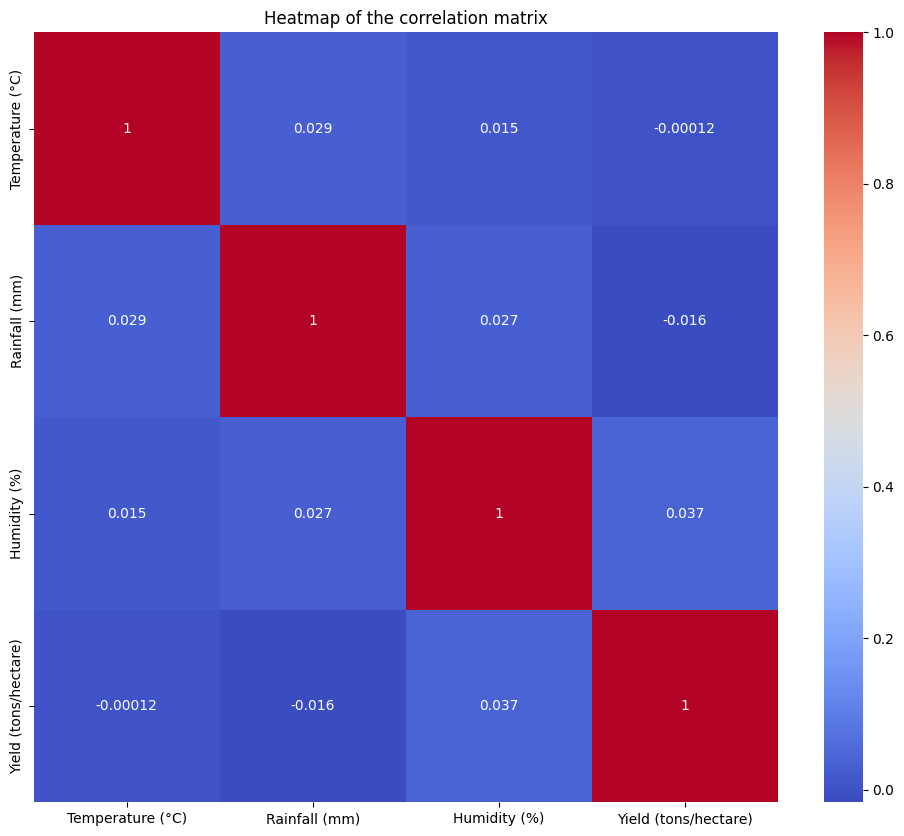

In [170]:
pl.plot_heatmap(data)